In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4636,4012,1.125216,0.163179,0.498409,1.625812,-0.202659,-0.154266,-0.078656,-0.032005,1.757896,...,-0.253248,-0.353874,-0.054588,0.001569,0.590922,-0.349627,0.001094,0.010770,29.99,0.0
1273,980,-0.370801,0.991591,1.156488,-0.119425,0.177933,-0.497759,0.532327,0.148150,-0.492472,...,-0.243260,-0.713885,-0.054271,-0.078738,-0.176470,0.078166,0.234831,0.083048,3.56,0.0
5201,4972,1.098244,-0.100154,1.096630,1.597263,-0.915397,-0.282792,-0.541985,0.009442,2.273679,...,-0.053218,0.179254,-0.145289,0.331523,0.567587,-0.254045,0.017003,0.027445,47.77,0.0
4225,3752,-0.623444,0.097929,1.985744,-1.231730,0.014521,1.025585,-0.167525,0.391701,-0.191505,...,-0.002158,0.136773,0.202057,-0.738207,-0.531860,-0.432879,0.118292,0.089969,43.29,0.0
3368,2912,1.357077,-0.193785,-0.517350,-1.246472,-0.037901,-0.524172,-0.046283,-0.034692,1.075581,...,0.000773,0.053417,-0.282324,-0.853258,0.880898,-0.541363,0.025465,-0.007292,1.00,0.0


In [30]:
df.drop('Time', axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      11665 non-null  float64
 1   V2      11665 non-null  float64
 2   V3      11665 non-null  float64
 3   V4      11665 non-null  float64
 4   V5      11665 non-null  float64
 5   V6      11665 non-null  float64
 6   V7      11665 non-null  float64
 7   V8      11665 non-null  float64
 8   V9      11665 non-null  float64
 9   V10     11665 non-null  float64
 10  V11     11665 non-null  float64
 11  V12     11664 non-null  float64
 12  V13     11664 non-null  float64
 13  V14     11664 non-null  float64
 14  V15     11664 non-null  float64
 15  V16     11664 non-null  float64
 16  V17     11664 non-null  float64
 17  V18     11664 non-null  float64
 18  V19     11664 non-null  float64
 19  V20     11664 non-null  float64
 20  V21     11664 non-null  float64
 21  V22     11664 non-null  float64
 22

In [32]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [33]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)


In [34]:
df_imputed.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
df_imputed['Amount'].describe()

count    11665.000000
mean        62.790606
std        179.809739
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [36]:
non_fraud = df_imputed[df_imputed.Class == 0]['Class'].count()
print('Non-fraudulent transactions:', non_fraud)

fraud = df_imputed[df_imputed.Class == 1]['Class'].count()
print('Fraudulent transactions:', fraud)

percent = round((fraud / (fraud + non_fraud)) * 100,2)
print('Percentage of fraudulent transactions:', percent,'%')

Non-fraudulent transactions: 11616
Fraudulent transactions: 49
Percentage of fraudulent transactions: 0.42 %


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_imputed['Amount'] = scaler.fit_transform(df_imputed['Amount'].values.reshape(-1,1))
x = df_imputed.drop('Class', axis=1)
y = df_imputed['Class']

Accuracy: 99.95713673381911 %


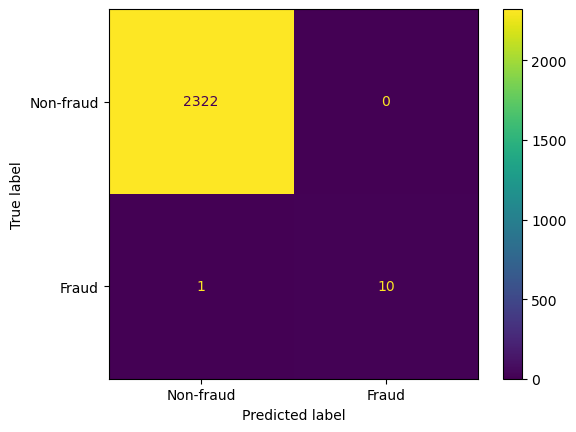

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,'%')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-fraud', 'Fraud'])
disp.plot()
plt.show()